In [2]:
import os
import numpy as np
import pandas as pd
import pypsa
import matplotlib.pyplot as plt

In [3]:
n = pypsa.Network("networks/sample/solved/1993_181_90m_c1.25_Co2L0.0-1H.nc")

INFO:pypsa.io:Imported network 1993_181_90m_c1.25_Co2L0.0-1H.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units


/home/cs/miniforge3/envs/RD_env/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/home/cs/miniforge3/envs/RD_env/lib/python3.12/site-packages/pypsa/plot.py:323: RuntimeWarning: invalid value encountered in scalar power
  radius = s.at[b_i] ** 0.5


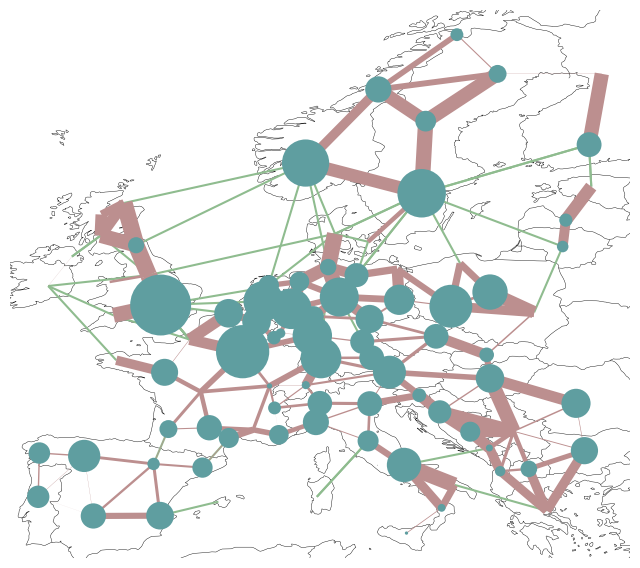

In [31]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import pypsa
import numpy as np

# Define the period
period = slice('1993-11-21 16:00:00', '1993-11-30 06:00:00')
num_hours = n.loads_t.p_set.loc[period].shape[0]

# Calculate the summed mismatch over the period for each bus
# Sum the mismatch for each bus over the specified time period
mismatch = n.loads_t.p_set.loc[period].sum(axis=0) - n.generators_t.p.loc[period].sum(axis=0).groupby([n.generators["bus"]]).sum()

# Get the bus sizes based on the summed mismatch (scale appropriately)
bus_sizes = mismatch  # Scale to fit your desired plot size

# Transmission line usage
# Get the used transmission capacities (p0 or p1, depending on direction)
used_transmission = n.lines_t.p0.loc[period].sum(axis=0)  # Summing for all lines
transmission_sizes = (n.lines_t.p0.loc[period].sum(axis=0) / (n.lines.s_nom_opt*num_hours)).abs()

# Plot the base map using Cartopy
fig, ax = plt.subplots(subplot_kw={"projection": ccrs.PlateCarree()}, figsize=(8, 8))

# Plot the network with customized bus sizes and line widths
n.plot(ax=ax,
       line_widths=transmission_sizes*20,  # Adjust multiplier for visibility
       bus_sizes=bus_sizes/1000000,  # Adjust multiplier for bus sizes
       #bus_colors=n.carriers.color,
)

# Show the plot
plt.show()


In [25]:
#n.generators_t.p.sum(axis=2).loc[period].sum(axis=0)
#n.generators_t.p.loc[period].sum(axis=0).groupby([n.generators["bus"]]).sum()
#n.loads_t.p_set.loc[period].sum(axis=0)
n.lines_t.p0.loc[period].sum(axis=0)
#n.lines_t.p0.loc[period].sum(axis=0) / n.lines.s_nom
num_hours = n.loads_t.p_set.loc[period].shape[0]
(n.lines_t.p0.loc[period].sum(axis=0) / (n.lines.s_nom_opt*num_hours)).abs()

Line
1      0.311555
2      0.346564
3      0.083913
4      0.108564
5      0.076209
         ...   
140    0.453578
141    0.054551
142    0.053695
143    0.513440
144    0.551465
Length: 144, dtype: float64

/home/cs/miniforge3/envs/RD_env/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/home/cs/miniforge3/envs/RD_env/lib/python3.12/site-packages/pypsa/plot.py:323: RuntimeWarning: invalid value encountered in scalar power
  radius = s.at[b_i] ** 0.5


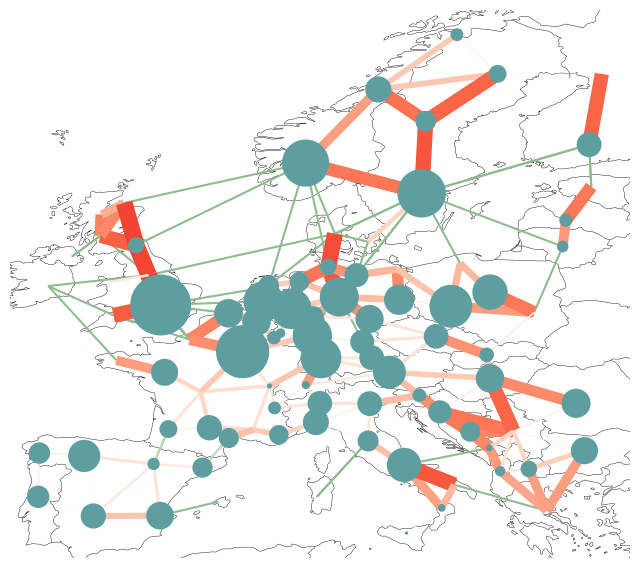

In [37]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Define the period
period = slice('1993-11-21 16:00:00', '1993-11-30 06:00:00')
num_hours = n.loads_t.p_set.loc[period].shape[0]

# Calculate the summed mismatch over the period for each bus
mismatch = n.loads_t.p_set.loc[period].sum(axis=0) - n.generators_t.p.loc[period].sum(axis=0).groupby([n.generators["bus"]]).sum()

# Get the bus sizes based on the summed mismatch (scale appropriately)
bus_sizes = mismatch  # Scale to fit your desired plot size

# Transmission line usage
transmission_sizes = (n.lines_t.p0.loc[period].sum(axis=0) / (n.lines.s_nom_opt * num_hours)).abs()

# Normalize the transmission_sizes to range [0, 1]
norm = mcolors.Normalize(vmin=0, vmax=1)

# Map normalized transmission sizes to colors using Reds colormap
line_colors = pd.Series(
    [cm.Reds(norm(value)) for value in transmission_sizes], index=n.lines.index
)

# Plot the base map using Cartopy
fig, ax = plt.subplots(subplot_kw={"projection": ccrs.PlateCarree()}, figsize=(8, 8))

# Plot the network with customized line widths and colors
n.plot(
    ax=ax,
    line_widths=transmission_sizes * 20,  # Adjust multiplier for visibility
    line_colors=line_colors,  # Apply the calculated colors as a Series
    bus_sizes=bus_sizes / 1000000,  # Adjust multiplier for bus sizes
)

# Show the plot
plt.show()


/home/cs/miniforge3/envs/RD_env/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


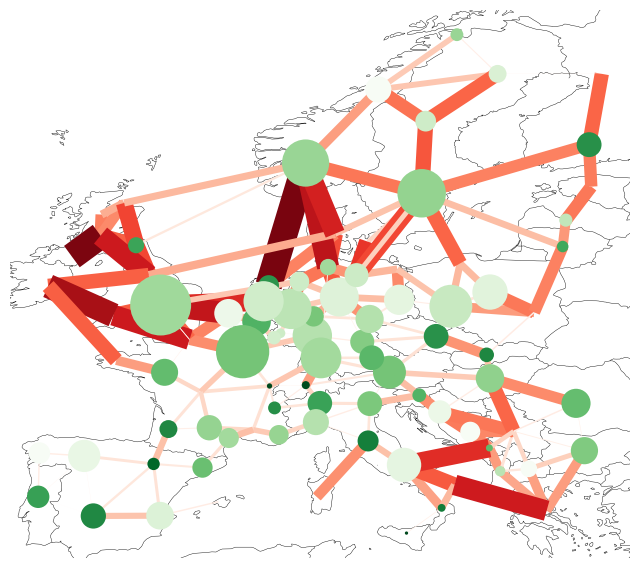

In [23]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.cm as cm
import pandas as pd

# Define the period
period = slice('1993-11-21 16:00:00', '1993-11-30 06:00:00')
num_hours = n.loads_t.p_set.loc[period].shape[0]

# Calculate the summed mismatch over the period for each bus
mismatch = n.loads_t.p_set.loc[period].sum(axis=0) - n.generators_t.p.loc[period].sum(axis=0).groupby([n.generators["bus"]]).sum()

# Get the bus sizes based on the summed mismatch (scale appropriately)
bus_sizes = np.maximum(1e-5, mismatch)  # Scale to fit your desired plot size

# Calculate the ratio of used to nominal transmission capacity for each line
line_ratio = (n.lines_t.p0.loc[period].sum(axis=0).abs() / (n.lines.s_nom_opt * num_hours)) #.clip(0, 1)  # Clip to ensure values are between 0 and 1
link_ratio = (n.links_t.p0.loc[period].sum(axis=0).abs() / (n.links.p_nom_opt * num_hours))
bus_ratio = (n.generators_t.p.loc[period].sum(axis=0).groupby([n.generators["bus"]]).sum() / n.loads_t.p_set.loc[period].sum(axis=0))

# Map transmission ratios to colors using Reds colormap
line_colors = pd.Series(
    [cm.Reds(value) for value in line_ratio], index=n.lines.index
)
link_colors = pd.Series(
    [cm.Reds(value) for value in link_ratio], index=n.links.index
)
bus_colors = pd.Series(
    [cm.Greens(value) for value in bus_ratio], index=n.buses.index
)

# Plot the base map using Cartopy
fig, ax = plt.subplots(subplot_kw={"projection": ccrs.PlateCarree()}, figsize=(8, 8))

# Plot the network with customized line widths and colors
n.plot(
    ax=ax,
    line_widths=line_ratio * 20,  # Adjust multiplier for visibility
    line_colors=line_colors,  # Apply the calculated colors as a Series
    link_widths=link_ratio * 20,  # Adjust multiplier for visibility
    link_colors=link_colors,  # Apply the calculated colors as a Series
    bus_sizes=bus_sizes*1e-6,  # Adjust multiplier for bus sizes
    bus_colors=bus_colors
    #bus_sizes=n.generators_t.p.sum(axis=0).groupby([n.generators["bus"], n.generators["carrier"]]).sum()/100000000.,
    #bus_colors=n.carriers.color
)

# Show the plot
plt.show()


In [63]:
n.lines_t.p0.loc[period].sum(axis=0).abs()
n.links_t.p0.loc[period].sum(axis=0).abs()
pd.concat([n.lines_t.p0.loc[period].sum(axis=0).abs(), n.links_t.p0.loc[period].sum(axis=0).abs()])
n.generators_t.p.loc[period].sum(axis=0).groupby([n.generators["bus"]]).sum() / n.loads_t.p_set.loc[period].sum(axis=0)
n.carriers

,co2_emissions,color,nice_name,max_growth,max_relative_growth
Carrier,,,,,
solar,0.0,#f9d002,Solar,inf,0.0
onwind,0.0,#235ebc,Onshore Wind,inf,0.0
biomass,0.0,#0c6013,Biomass,inf,0.0
offwind-ac,0.0,#6895dd,Offshore Wind (AC),inf,0.0
offwind-dc,0.0,#74c6f2,Offshore Wind (DC),inf,0.0
nuclear,0.0,#ff9000,Nuclear,inf,0.0
hydro,0.0,#08ad97,Reservoir & Dam,inf,0.0
PHS,0.0,#08ad97,Pumped Hydro Storage,inf,0.0
ror,0.0,#4adbc8,Run of River,inf,0.0


/home/cs/miniforge3/envs/RD_env/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


TypeError: Axes.pie() got an unexpected keyword argument 'transform'

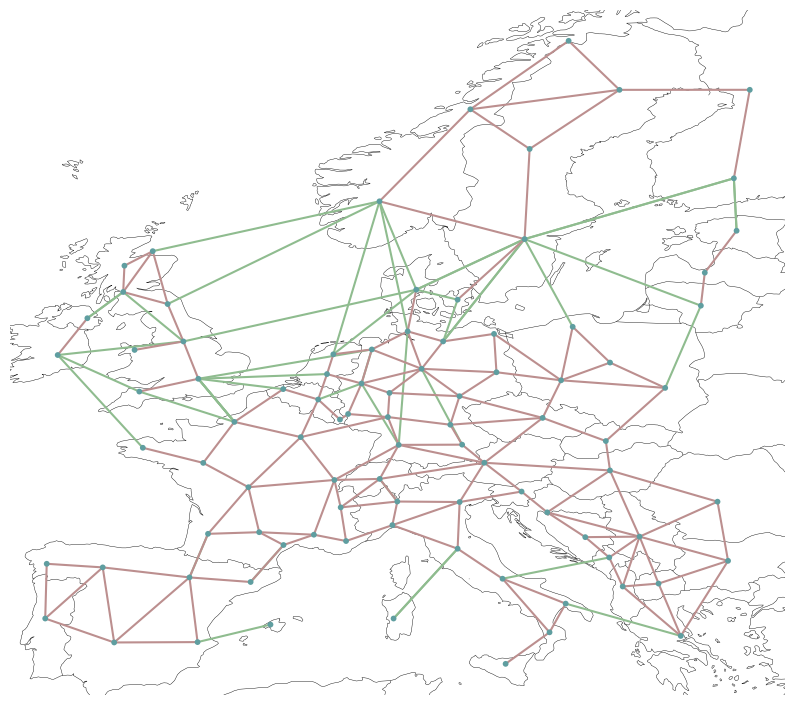

In [114]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pypsa

# Define the period of interest (adjust as needed)
period = slice('1993-11-21 16:00:00', '1993-11-30 06:00:00')

# Calculate total load for each bus
total_load_per_bus = n.loads_t.p_set.loc[period].sum(axis=0)

# Calculate total generation for each bus
total_generation_per_bus = n.generators_t.p.loc[period].sum(axis=0).groupby([n.generators["bus"]]).sum()

# Calculate total storage for each bus (charge + discharge)
total_storage_per_bus = n.storage_units_t.p_dispatch.loc[period].sum(axis=0).groupby([n.storage_units["bus"]]).sum()

# Calculate total imports for each bus (imported power through lines or links)
# Add imports from lines (p0 corresponds to incoming power for bus0)
total_imports_per_bus = pd.Series(0.0, index=n.buses.index)
for idx, line in n.lines.iterrows():
    bus0 = line['bus0']
    bus1 = line['bus1']
    total_imports_per_bus[bus0] += n.lines_t.p0.loc[period, idx].sum()  # Flow at bus0
    total_imports_per_bus[bus1] += n.lines_t.p1.loc[period, idx].sum()  # Flow at bus1

# Add imports from links (p0 corresponds to incoming power for bus0)
for idx, link in n.links.iterrows():
    bus0 = link['bus0']
    bus1 = link['bus1']
    total_imports_per_bus[bus0] += n.links_t.p0.loc[period, idx].sum()  # Flow at bus0
    total_imports_per_bus[bus1] += n.links_t.p1.loc[period, idx].sum()  # Flow at bus1

# Prepare the pie chart for each bus
fractions = {}
for bus in n.buses.index:
    load = total_load_per_bus[bus]
    generation = total_generation_per_bus[bus]
    storage = total_storage_per_bus[bus]
    imports = np.abs(total_imports_per_bus[bus])
    
    # Avoid division by zero by checking if the load is zero
    if load != 0:
        generation_fraction = generation / load
        storage_fraction = storage / load
        imports_fraction = imports / load
    else:
        generation_fraction = storage_fraction = imports_fraction = 0

    # Store the fractions for pie chart
    fractions[bus] = [generation_fraction, storage_fraction, imports_fraction]

# Plot the base map using Cartopy
fig, ax = plt.subplots(subplot_kw={"projection": ccrs.PlateCarree()}, figsize=(10, 10))

# Plot the network (this will display the buses, lines, etc.)
n.plot(ax=ax)

# Plot pie charts at each bus location
for bus, (generation_fraction, storage_fraction, imports_fraction) in fractions.items():
    # Get the bus location (lat, lon)
    lat, lon = n.buses.loc[bus, ["x", "y"]]
    
    # Data for the pie chart: [generation, storage, imports]
    sizes = [generation_fraction, storage_fraction, imports_fraction]
    labels = ['Generation', 'Storage', 'Imports']
    colors = ['#ff9999', '#66b3ff', '#99ff99']
    
    # Plot the pie chart at the bus location
    # You may need to adjust the size and position of the pie chart on the map
    # Plot pie chart using ax.pie with transformed coordinates (lat, lon)
    ax.pie(sizes, colors=colors, startangle=90, 
           radius=0.05, center=(lon, lat), transform=ccrs.PlateCarree())

# Add title and show the plot
plt.title("Load Coverage by Generation, Storage, and Imports")
plt.show()

In [110]:
n.generators_t.p.loc[period].sum(axis=0)
n.storage_units

,bus,control,type,p_nom,p_nom_mod,p_nom_extendable,p_nom_min,p_nom_max,p_min_pu,p_max_pu,...,state_of_charge_initial_per_period,state_of_charge_set,cyclic_state_of_charge,cyclic_state_of_charge_per_period,max_hours,efficiency_store,efficiency_dispatch,standing_loss,inflow,p_nom_opt
StorageUnit,,,,,,,,,,,,,,,,,,,,,
AL0 0 hydro,AL0 0,PQ,,1493.70,0.0,False,0.0,inf,0.0,1.0,...,False,NaN,True,True,47.397202,0.000000,0.900000,0.0,0.0,1493.700000
AT0 0 PHS,AT0 0,PQ,,5044.30,0.0,False,0.0,inf,-1.0,1.0,...,False,NaN,True,True,307.461843,0.866025,0.866025,0.0,0.0,5044.300000
AT0 0 hydro,AT0 0,PQ,,3426.62,0.0,False,0.0,inf,0.0,1.0,...,False,NaN,True,True,933.864858,0.000000,0.900000,0.0,0.0,3426.620000
BA0 0 PHS,BA0 0,PQ,,440.00,0.0,False,0.0,inf,-1.0,1.0,...,False,NaN,True,True,0.007907,0.866025,0.866025,0.0,0.0,440.000000
BA0 0 hydro,BA0 0,PQ,,1695.50,0.0,False,0.0,inf,0.0,1.0,...,False,NaN,True,True,1474.491301,0.000000,0.900000,0.0,0.0,1695.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SE1 0 H2,SE1 0,PQ,,0.00,0.0,True,0.0,inf,-1.0,1.0,...,False,NaN,True,True,168.000000,0.680000,0.500000,0.0,0.0,0.502900
SE1 1 H2,SE1 1,PQ,,0.00,0.0,True,0.0,inf,-1.0,1.0,...,False,NaN,True,True,168.000000,0.680000,0.500000,0.0,0.0,0.591274
SE1 2 H2,SE1 2,PQ,,0.00,0.0,True,0.0,inf,-1.0,1.0,...,False,NaN,True,True,168.000000,0.680000,0.500000,0.0,0.0,0.836111


/home/cs/miniforge3/envs/RD_env/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


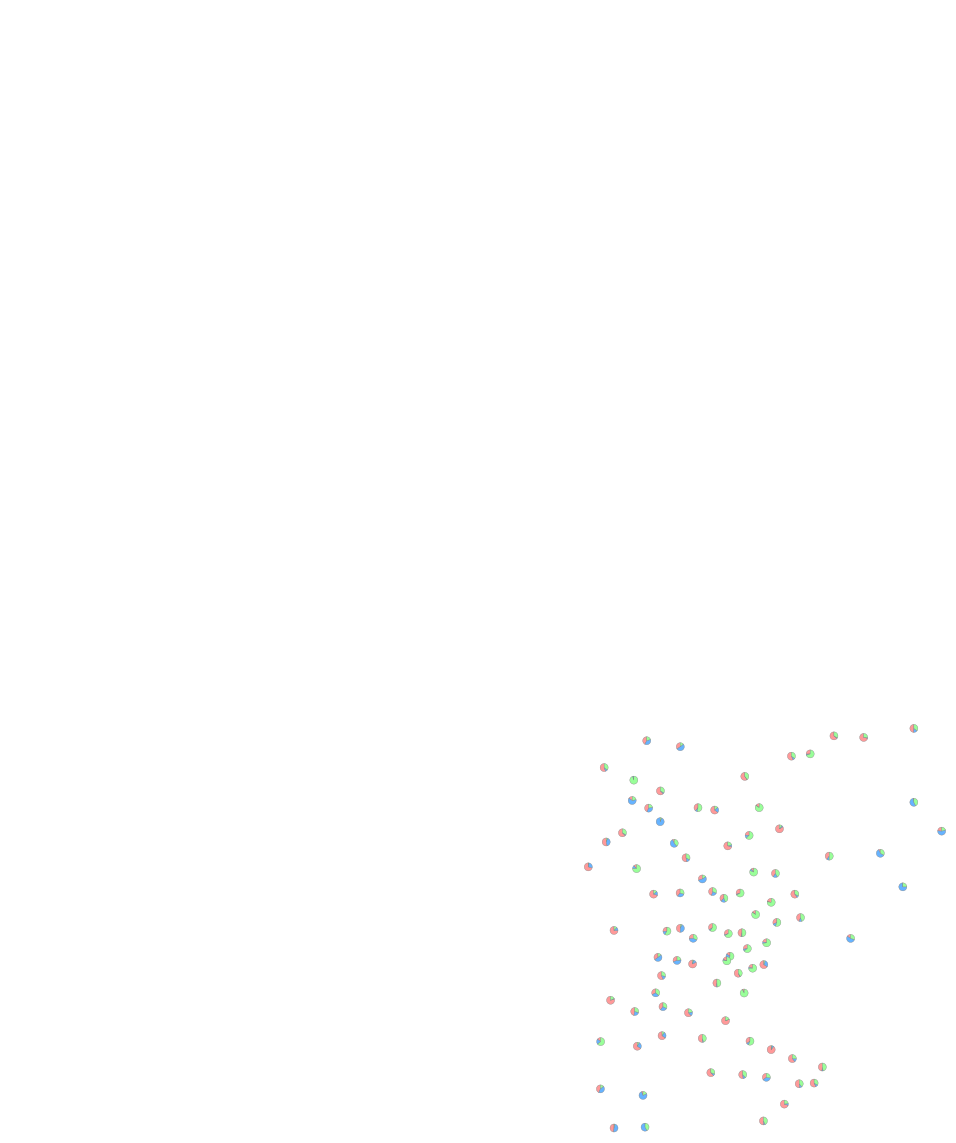

In [122]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pypsa
import cartopy.crs as ccrs
import cartopy.feature as cf
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Define the period of interest (adjust as needed)
period = slice('1993-11-21 16:00:00', '1993-11-30 06:00:00')

# Calculate total load for each bus
total_load_per_bus = n.loads_t.p_set.loc[period].sum(axis=0)

# Calculate total generation for each bus
total_generation_per_bus = n.generators_t.p.loc[period].sum(axis=0).groupby([n.generators["bus"]]).sum()

# Calculate total storage for each bus (charge + discharge)
total_storage_per_bus = n.storage_units_t.p_dispatch.loc[period].sum(axis=0).groupby([n.storage_units["bus"]]).sum()

# Calculate total imports for each bus (imported power through lines or links)
# Add imports from lines (p0 corresponds to incoming power for bus0)
total_imports_per_bus = pd.Series(0.0, index=n.buses.index)
for idx, line in n.lines.iterrows():
    bus0 = line['bus0']
    bus1 = line['bus1']
    total_imports_per_bus[bus0] += n.lines_t.p0.loc[period, idx].sum()  # Flow at bus0
    total_imports_per_bus[bus1] += n.lines_t.p1.loc[period, idx].sum()  # Flow at bus1

# Add imports from links (p0 corresponds to incoming power for bus0)
for idx, link in n.links.iterrows():
    bus0 = link['bus0']
    bus1 = link['bus1']
    total_imports_per_bus[bus0] += n.links_t.p0.loc[period, idx].sum()  # Flow at bus0
    total_imports_per_bus[bus1] += n.links_t.p1.loc[period, idx].sum()  # Flow at bus1

# Prepare the pie chart for each bus
fractions = {}
for bus in n.buses.index:
    load = total_load_per_bus[bus]
    generation = total_generation_per_bus[bus]
    storage = total_storage_per_bus[bus]
    imports = np.abs(total_imports_per_bus[bus])
    
    # Avoid division by zero by checking if the load is zero
    if load != 0:
        generation_fraction = generation / load
        storage_fraction = storage / load
        imports_fraction = imports / load
    else:
        generation_fraction = storage_fraction = imports_fraction = 0

    # Store the fractions for pie chart
    fractions[bus] = [generation_fraction, storage_fraction, imports_fraction]

# Plot the base map using Cartopy
fig = plt.figure(figsize=(10,8))
proj = ccrs.Miller(central_longitude=0)  # Set projection to Miller
ax = fig.add_subplot(1, 1, 1, projection=proj)
ax.add_feature(cf.COASTLINE, lw=0.5, edgecolor='gray')
ax.add_feature(cf.BORDERS, lw=0.5, edgecolor='gray')

# Plot the network (this will display the buses, lines, etc.)
n.plot(ax=ax)

# Plot pie charts at each bus location
for bus, (generation_fraction, storage_fraction, imports_fraction) in fractions.items():
    # Get the bus location (lat, lon)
    lat, lon = n.buses.loc[bus, ["x", "y"]]
    
    # Data for the pie chart: [generation, storage, imports]
    sizes = [generation_fraction, storage_fraction, imports_fraction]
    labels = ['Generation', 'Storage', 'Imports']
    colors = ['#ff9999', '#66b3ff', '#99ff99']
    
    # Create inset axes for the pie chart at each bus location
    ax_sub = inset_axes(ax, width=0.1, height=0.1, loc=10, bbox_to_anchor=(lon, lat), bbox_transform=ax.transData)
    
    # Plot the pie chart on the inset axes
    ax_sub.pie(sizes, colors=colors, startangle=90, 
               wedgeprops={'edgecolor': 'gray', 'linewidth': 0.25})
    ax_sub.set(aspect='equal')  # Ensure the pie chart is circular

# Set the extent of the map
ax.set_extent((-12, 44, 35, 88), ccrs.Miller())

# Add title and show the plot
plt.show()


/home/cs/miniforge3/envs/RD_env/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


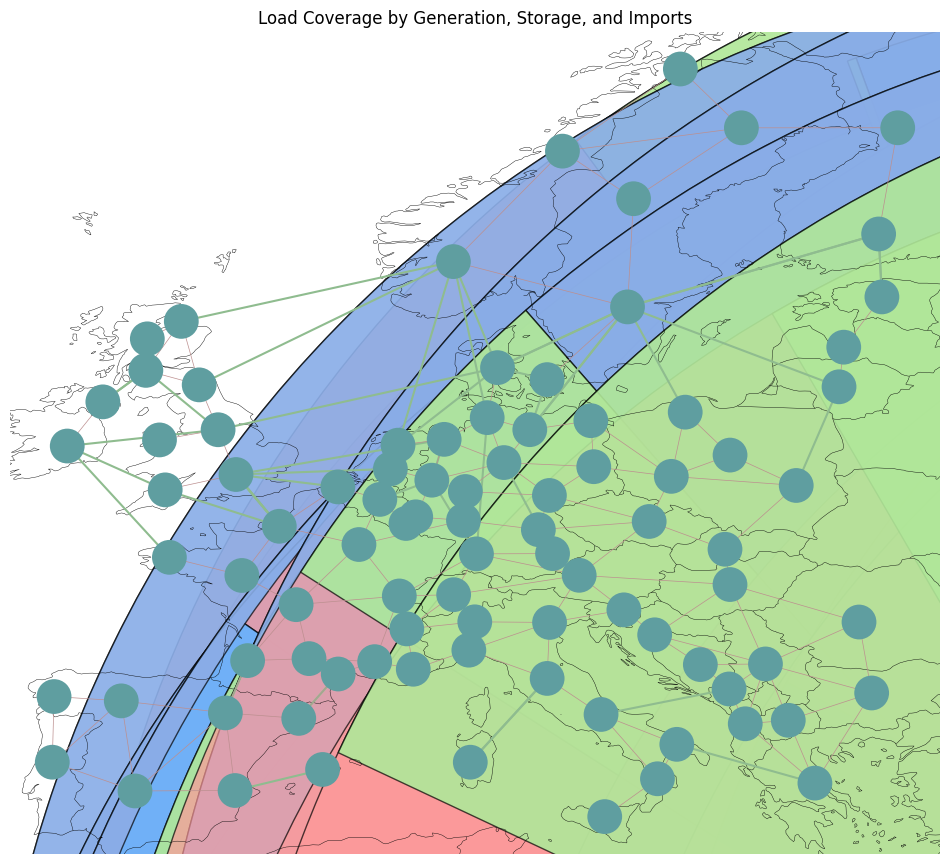

In [159]:
import matplotlib.pyplot as plt
import numpy as np
import pypsa
import cartopy.crs as ccrs
import matplotlib.patches as patches
from cartopy.mpl.geoaxes import GeoAxes

# Define the period of interest (adjust as needed)
period = slice('1993-11-21 16:00:00', '1993-11-30 06:00:00')

# Calculate total load for each bus
total_load_per_bus = n.loads_t.p_set.loc[period].sum(axis=0)

# Calculate total generation for each bus
total_generation_per_bus = n.generators_t.p.loc[period].sum(axis=0).groupby([n.generators["bus"]]).sum()

# Calculate total storage for each bus (charge + discharge)
total_storage_per_bus = n.storage_units_t.p_dispatch.loc[period].sum(axis=0).groupby([n.storage_units["bus"]]).sum()

# Calculate total imports for each bus (imported power through lines or links)
total_imports_per_bus = pd.Series(0.0, index=n.buses.index)
for idx, line in n.lines.iterrows():
    bus0 = line['bus0']
    bus1 = line['bus1']
    total_imports_per_bus[bus0] += n.lines_t.p0.loc[period, idx].sum()  # Flow at bus0
    total_imports_per_bus[bus1] += n.lines_t.p1.loc[period, idx].sum()  # Flow at bus1

for idx, link in n.links.iterrows():
    bus0 = link['bus0']
    bus1 = link['bus1']
    total_imports_per_bus[bus0] += n.links_t.p0.loc[period, idx].sum()  # Flow at bus0
    total_imports_per_bus[bus1] += n.links_t.p1.loc[period, idx].sum()  # Flow at bus1

# Prepare the pie chart for each bus
fractions = {}
for bus in n.buses.index:
    load = total_load_per_bus[bus]
    generation = total_generation_per_bus[bus]
    storage = total_storage_per_bus[bus]
    imports = np.abs(total_imports_per_bus[bus])
    
    if load != 0:
        generation_fraction = generation / load
        storage_fraction = storage / load
        imports_fraction = imports / load
    else:
        generation_fraction = storage_fraction = imports_fraction = 0

    fractions[bus] = [generation_fraction, storage_fraction, imports_fraction]

# Create the plot using Cartopy
fig, ax = plt.subplots(subplot_kw={"projection": ccrs.PlateCarree()}, figsize=(12, 12))

# Plot the network (this will display the buses, lines, etc.)
n.plot(ax=ax, bus_sizes=0.5, line_widths=0.5)

# Set the extent of the map to a region of interest (optional to zoom in)
#ax.set_extent([min(n.buses['x']), max(n.buses['x']), min(n.buses['y']), max(n.buses['y'])], crs=ccrs.PlateCarree())

# Plot pie charts at each bus location
for bus, (generation_fraction, storage_fraction, imports_fraction) in fractions.items():
    # Get the bus location (lat, lon)
    lat, lon = n.buses.loc[bus, ["x", "y"]]
    
    # Data for the pie chart: [generation, storage, imports]
    sizes = [generation_fraction, storage_fraction, imports_fraction]
    colors = ['#ff9999', '#66b3ff', '#99ff99']

    # Plot the pie chart using patches (Wedge)
    wedges = []
    start_angle = 90
    radius = 50 # Adjust the radius of the pie chart (smaller radius)
    for i, size in enumerate(sizes):
        wedge = patches.Wedge(center=(lon, lat), r=radius, theta1=start_angle, 
                             theta2=start_angle + size * 360, facecolor=colors[i], edgecolor="black", lw=1, alpha=0.7)
        ax.add_patch(wedge)
        start_angle += size * 360  # Update start angle for the next wedge

# Add title and show the plot
plt.title("Load Coverage by Generation, Storage, and Imports")
plt.show()


INFO:pypsa.io:Imported network 2002_181_90m_c1.25_Co2L0.0-1H_UC_solved.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units
/home/cs/miniforge3/envs/RD_env/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


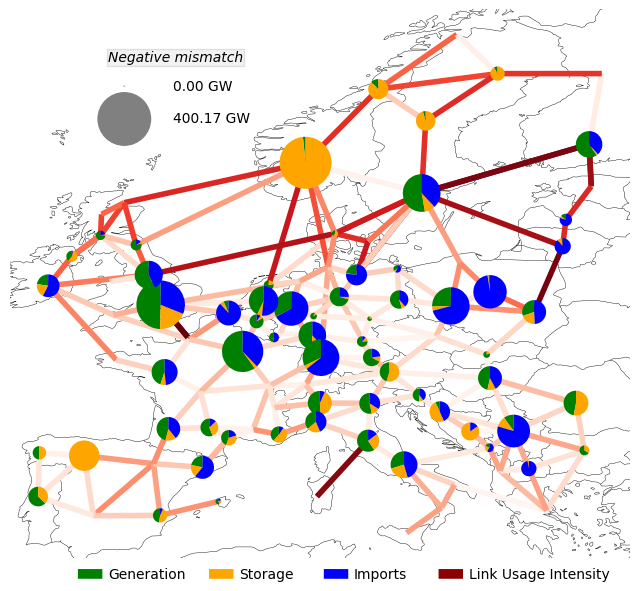

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pypsa
import cartopy.crs as ccrs
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import pandas as pd
from datetime import datetime
from matplotlib.dates import date2num
import matplotlib.cm as cm
from matplotlib.patches import Circle

n = pypsa.Network("networks/outputs/solved/2002_181_90m_c1.25_Co2L0.0-1H_UC_solved.nc")

# Define the period of interest (adjust as needed)
#period = slice('2003-02-06 17:00:00', '2003-02-15 07:00:00')
#period = slice('2003-01-04 09:00:00', '2003-01-11 08:00:00')
#period = slice('2003-01-10 08:00:00', '2003-01-11 08:00:00')
period = slice('2003-02-142003-02-11 18:00:00+00:002003-02-11 18:00:00+00:00 07:00:00', '2003-02-15 07:00:00')
num_hours = n.loads_t.p_set.loc[period].shape[0]

# Calculate total load for each bus
total_load_per_bus = n.loads_t.p_set.loc[period].sum(axis=0)

# Calculate total generation for each bus
total_generation_per_bus = n.generators_t.p.loc[period].sum(axis=0).groupby([n.generators["bus"]]).sum()

# Calculate total storage for each bus (charge + discharge)
total_storage_per_bus = n.storage_units_t.p_dispatch.loc[period].sum(axis=0).groupby([n.storage_units["bus"]]).sum()

# Calculate total imports for each bus (imported power through lines or links)
total_imports_per_bus = pd.Series(0.0, index=n.buses.index)
for idx, line in n.lines.iterrows():
    bus0 = line['bus0']
    bus1 = line['bus1']
    total_imports_per_bus[bus0] += n.lines_t.p0.loc[period, idx].sum()  # Flow at bus0
    total_imports_per_bus[bus1] += n.lines_t.p1.loc[period, idx].sum()  # Flow at bus1

for idx, link in n.links.iterrows():
    bus0 = link['bus0']
    bus1 = link['bus1']
    total_imports_per_bus[bus0] += n.links_t.p0.loc[period, idx].sum()  # Flow at bus0
    total_imports_per_bus[bus1] += n.links_t.p1.loc[period, idx].sum()  # Flow at bus1

# Prepare the pie chart for each bus
fractions = {}
for bus in n.buses.index:
    load = total_load_per_bus[bus]
    generation = total_generation_per_bus[bus]
    storage = total_storage_per_bus[bus]
    imports = np.abs(np.minimum(0, total_imports_per_bus[bus]))
    
    if load != 0:
        generation_fraction = generation / load
        storage_fraction = storage / load
        imports_fraction = imports / load
    else:
        generation_fraction = storage_fraction = imports_fraction = 0

    fractions[bus] = [generation_fraction, storage_fraction, imports_fraction]


# Calculate the summed mismatch over the period for each bus
mismatch = n.loads_t.p_set.loc[period].sum(axis=0) - n.generators_t.p.loc[period].sum(axis=0).groupby([n.generators["bus"]]).sum()
# Get the bus sizes based on the summed mismatch (scale appropriately)
bus_sizes = np.maximum(1e-5, mismatch) # Scale to fit your desired plot size
#bus_sizes_norm = np.maximum(1e-5,(bus_sizes - bus_sizes.min()) / (bus_sizes.max() - bus_sizes.min()))

# Calculate the ratio of used to nominal transmission capacity for each line
line_ratio = (n.lines_t.p0.loc[period].sum(axis=0).abs() / (n.lines.s_nom_opt * num_hours)) #.clip(0, 1)  # Clip to ensure values are between 0 and 1
link_ratio = (n.links_t.p0.loc[period].sum(axis=0).abs() / (n.links.p_nom_opt * num_hours))
# Map transmission ratios to colors using Reds colormap
line_colors = pd.Series(
    [cm.Reds(value) for value in line_ratio], index=n.lines.index
)
link_colors = pd.Series(
    [cm.Reds(value) for value in link_ratio], index=n.links.index
)

# Create the plot using Cartopy
fig, ax = plt.subplots(subplot_kw={"projection": ccrs.PlateCarree()}, figsize=(8, 8))

# Plot the network (this will display the buses, lines, etc.)
n.plot(ax=ax, bus_sizes=1e-6, line_widths=4, line_colors=line_colors, link_widths=4, link_colors=link_colors)

# Set the extent of the map to a region of interest (optional to zoom in)
#ax.set_extent([min(n.buses['x']), max(n.buses['x']), min(n.buses['y']), max(n.buses['y'])], crs=ccrs.PlateCarree())

# Plot pie charts at each bus location using inset_axes
for bus, (generation_fraction, storage_fraction, imports_fraction) in fractions.items():
    # Get the bus location (lat, lon)
    lat, lon = n.buses.loc[bus, ["x", "y"]]
    
    # Data for the pie chart: [generation, storage, imports]
    sizes = [generation_fraction, storage_fraction, imports_fraction]
    colors = ['green', 'orange', 'blue']

    # Transform the coordinates from geo to figure coordinates using Cartopy's projection
    lonr, latr = ax.projection.transform_point(lon, lat, ccrs.PlateCarree())

    # Create the inset_axes for the pie chart with absolute width and height (not percentage)
    ax_sub = inset_axes(ax, width=0.05, height=0.05, loc="center", bbox_to_anchor=(lat, lon),
                        bbox_transform=ax.transData, borderpad=0)
    
    # Plot the pie chart inside the inset_axes
    scaling_factor = 13 / (bus_sizes.max()**0.5)
    wedges, texts = ax_sub.pie(sizes, colors=colors, startangle=90, radius=bus_sizes[bus]**0.5*scaling_factor)  # **0.5 is scaling build into n.plot

    # Ensure the pie chart has equal aspect ratio
    ax_sub.set_aspect("equal")

ax.annotate('Generation', xy=(-6, 35.25), xytext=(-4, 35), fontsize=10,
            arrowprops=dict(color='green', arrowstyle='-', linewidth=7, capstyle='butt'),
    transform=ccrs.PlateCarree())
ax.annotate('Storage', xy=(2, 35.25), xytext=(4, 35), fontsize=10,
            arrowprops=dict(color='orange', arrowstyle='-', linewidth=7, capstyle='butt'),
    transform=ccrs.PlateCarree())
ax.annotate('Imports', xy=(9, 35.25), xytext=(11, 35), fontsize=10,
            arrowprops=dict(color='blue', arrowstyle='-', linewidth=7, capstyle='butt'),
    transform=ccrs.PlateCarree())
ax.annotate('Link Usage Intensity', xy=(16, 35.25), xytext=(18, 35), fontsize=10,
            arrowprops=dict(color='darkred', arrowstyle='-', linewidth=7, capstyle='butt'),
    transform=ccrs.PlateCarree())
# sizes = [bus_sizes.min()*1e-6, bus_sizes.max()**0.5*scaling_factor]
# labels = [f'{bus_sizes.min()*1e-3:.2f} GW', f'{bus_sizes.max()*1e-3:.2f} GW']
# pypsa.plot.add_legend_circles(ax, sizes, labels, srid=4326, patch_kw=dict(facecolor='grey'), legend_kw={
#     'loc': 'center',  # Relative position inside the legend box
#     'bbox_to_anchor': (0.3, 0.9),  # Coordinates of the legend box's corner relative to the axes
#     'title': 'Negative Mismatch',
#     'frameon': False,
#     'handleheight': 1,  # Increase spacing between circle handles
#     'handlelength': 2,  # Adjust the horizontal spacing of handles
#     'labelspacing': 1  # Increase spacing between labels
#     })
# Parameters

# Add the circles to the axis
ax.add_patch(Circle((-3, 65), 1e-2, color='grey', alpha=1)) #, ec='black'
ax.add_patch(Circle((-3, 63), 1.6, color='grey', alpha=1))
ax.text(0, 63, f'{bus_sizes.max() * 1e-3:.2f} GW', va='center')
ax.text(0, 65, f'{bus_sizes.min()* 1e-3:.2f} GW', va='center')
ax.text(-4, 66.5, 'Negative mismatch', style='italic',
    bbox={'facecolor': 'grey', 'alpha': 0.1, 'pad': 1},
    transform=ccrs.PlateCarree() 
)

# Add title and show the plot
plt.show()


In [35]:
# n.generators_t.p.loc[period].sum(axis=0).groupby([n.generators["bus"]]).sum()
# n.loads_t.p_set.loc[period].sum(axis=0)
# n.lines_t.p0+n.lines_t.p1
# total_imports_per_bus
# np.maximum(1e-5, mismatch)
# bus_sizes.min()*1e-3
bus_sizes.max()**0.5 #*0.7e-2

313.50597655116303

In [68]:
# Get dual variables and line capacities
mu_lower = n.lines_t.mu_lower
mu_upper = n.lines_t.mu_upper
capacities = n.lines.s_nom

# Compute congestion rent for each time step
congestion_rent_t = (mu_lower + mu_upper).multiply(capacities, axis=1).sum(axis=1)

# Total congestion rent over all time steps
total_congestion_rent = congestion_rent_t.sum()

print("Congestion rent at each time step:")
print(congestion_rent_t)

print("\nTotal congestion rent:")
print(total_congestion_rent)

Congestion rent at each time step:
snapshot
1993-07-01 00:00:00   -41.352205
1993-07-01 01:00:00   -40.077750
1993-07-01 02:00:00   -38.692437
1993-07-01 03:00:00   -36.908705
1993-07-01 04:00:00   -34.550201
                         ...    
1994-06-30 19:00:00   -50.719703
1994-06-30 20:00:00   -47.144370
1994-06-30 21:00:00   -47.527919
1994-06-30 22:00:00   -49.337568
1994-06-30 23:00:00   -51.135085
Length: 8760, dtype: float64

Total congestion rent:
2434804890.0698953


In [9]:
period = slice('1993-11-21 16:00:00', '1993-11-30 06:00:00')
# Extract the shadow prices (dual variables)
shadow_prices = n.buses_t.marginal_price.loc[period].mean(axis=0)
shadow_prices
n.buses

,v_nom,type,x,y,carrier,unit,v_mag_pu_set,v_mag_pu_min,v_mag_pu_max,control,generator,sub_network,country
Bus,,,,,,,,,,,,,
AL0 0,380.0,,19.927367,41.531444,AC,,1.0,0.0,inf,Slack,AL1 0 offwind-ac,,AL
AT0 0,380.0,,13.174287,47.569450,AC,,1.0,0.0,inf,PQ,,,AT
BA0 0,380.0,,18.101135,43.938903,AC,,1.0,0.0,inf,PQ,,,BA
BE0 0,380.0,,5.066985,50.655320,AC,,1.0,0.0,inf,PQ,,,BE
BE0 1,380.0,,3.359803,51.163557,AC,,1.0,0.0,inf,PQ,,,BE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
SE1 0,380.0,,19.770511,65.767014,AC,,1.0,0.0,inf,PQ,,,SE
SE1 1,380.0,,15.139395,58.484531,AC,,1.0,0.0,inf,PQ,,,SE
SE1 2,380.0,,15.385293,62.883485,AC,,1.0,0.0,inf,PQ,,,SE


/home/cs/miniforge3/envs/RD_env/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


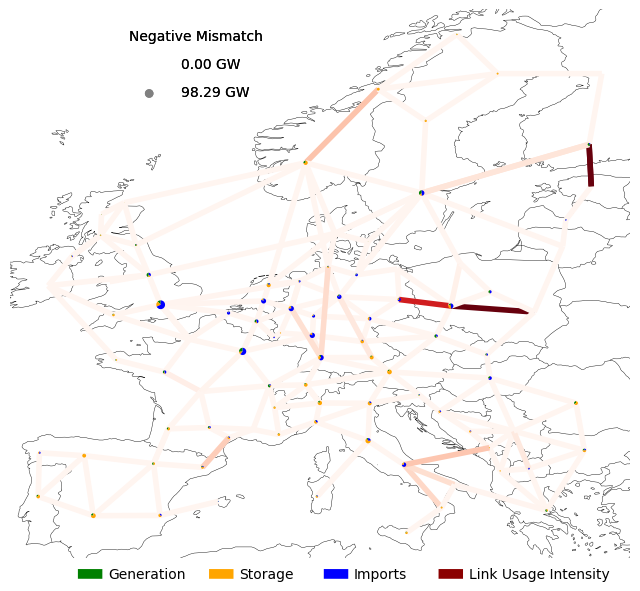

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pypsa
import cartopy.crs as ccrs
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import pandas as pd
from datetime import datetime
from matplotlib.dates import date2num
import matplotlib.cm as cm

# Define the period of interest (adjust as needed)
#period = slice('1993-11-21 16:00:00', '1993-11-30 06:00:00')
period = slice('1993-11-22 16:00:00', '1993-11-22 18:00:00')
num_hours = n.loads_t.p_set.loc[period].shape[0]

# Calculate total load for each bus
total_load_per_bus = n.loads_t.p_set.loc[period].sum(axis=0)

# Calculate total generation for each bus
total_generation_per_bus = n.generators_t.p.loc[period].sum(axis=0).groupby([n.generators["bus"]]).sum()

# Calculate total storage for each bus (charge + discharge)
total_storage_per_bus = n.storage_units_t.p_dispatch.loc[period].sum(axis=0).groupby([n.storage_units["bus"]]).sum()

# Calculate total imports for each bus (imported power through lines or links)
total_imports_per_bus = pd.Series(0.0, index=n.buses.index)
for idx, line in n.lines.iterrows():
    bus0 = line['bus0']
    bus1 = line['bus1']
    total_imports_per_bus[bus0] += n.lines_t.p0.loc[period, idx].sum()  # Flow at bus0
    total_imports_per_bus[bus1] += n.lines_t.p1.loc[period, idx].sum()  # Flow at bus1

for idx, link in n.links.iterrows():
    bus0 = link['bus0']
    bus1 = link['bus1']
    total_imports_per_bus[bus0] += n.links_t.p0.loc[period, idx].sum()  # Flow at bus0
    total_imports_per_bus[bus1] += n.links_t.p1.loc[period, idx].sum()  # Flow at bus1

# Prepare the pie chart for each bus
fractions = {}
for bus in n.buses.index:
    load = total_load_per_bus[bus]
    generation = total_generation_per_bus[bus]
    storage = total_storage_per_bus[bus]
    imports = np.abs(np.minimum(0, total_imports_per_bus[bus]))
    
    if load != 0:
        generation_fraction = generation / load
        storage_fraction = storage / load
        imports_fraction = imports / load
    else:
        generation_fraction = storage_fraction = imports_fraction = 0

    fractions[bus] = [generation_fraction, storage_fraction, imports_fraction]


# Calculate the summed mismatch over the period for each bus
mismatch = n.loads_t.p_set.loc[period].sum(axis=0) - n.generators_t.p.loc[period].sum(axis=0).groupby([n.generators["bus"]]).sum()
# Get the bus sizes based on the summed mismatch (scale appropriately)
bus_sizes = np.maximum(1e-5, mismatch) # Scale to fit your desired plot size
#bus_sizes_norm = np.maximum(1e-5,(bus_sizes - bus_sizes.min()) / (bus_sizes.max() - bus_sizes.min()))

# Calculate the ratio of used to nominal transmission capacity for each line
# Compute congestion rent for each line
mu_lower = n.lines_t.mu_lower
mu_upper = n.lines_t.mu_upper
capacities = n.lines.s_nom_opt

# Compute congestion rent for each time step
congestion_rent_t = (mu_lower + mu_upper).loc[period] #.multiply(capacities, axis=1).loc[period]

# Total congestion rent over the period for each line
total_congestion_rent = congestion_rent_t.sum(axis=0)

# Normalize congestion rent for color mapping
line_colors = pd.Series(
    [cm.Reds(value) for value in (total_congestion_rent / total_congestion_rent.max()).fillna(0)],
    index=n.lines.index
)

# Repeat for links if applicable
mu_lower_links = n.links_t.mu_lower
mu_upper_links = n.links_t.mu_upper
capacities_links = n.links.p_nom_opt

congestion_rent_links_t = (mu_lower_links + mu_upper_links).loc[period] #.multiply(capacities_links, axis=1).loc[period]
total_congestion_rent_links = congestion_rent_links_t.sum(axis=0)

link_colors = pd.Series(
    [cm.Reds(value) for value in (total_congestion_rent_links / total_congestion_rent_links.max()).fillna(0)],
    index=n.links.index
)

# Create the plot using Cartopy
fig, ax = plt.subplots(subplot_kw={"projection": ccrs.PlateCarree()}, figsize=(8, 8))

# Plot the network (this will display the buses, lines, etc.)
n.plot(ax=ax, bus_sizes=1e-6, line_widths=4, line_colors=line_colors, link_widths=4, link_colors=link_colors)

# Set the extent of the map to a region of interest (optional to zoom in)
#ax.set_extent([min(n.buses['x']), max(n.buses['x']), min(n.buses['y']), max(n.buses['y'])], crs=ccrs.PlateCarree())

# Plot pie charts at each bus location using inset_axes
for bus, (generation_fraction, storage_fraction, imports_fraction) in fractions.items():
    # Get the bus location (lat, lon)
    lat, lon = n.buses.loc[bus, ["x", "y"]]
    
    # Data for the pie chart: [generation, storage, imports]
    sizes = [generation_fraction, storage_fraction, imports_fraction]
    colors = ['green', 'orange', 'blue']

    # Transform the coordinates from geo to figure coordinates using Cartopy's projection
    lonr, latr = ax.projection.transform_point(lon, lat, ccrs.PlateCarree())

    # Create the inset_axes for the pie chart with absolute width and height (not percentage)
    ax_sub = inset_axes(ax, width=0.05, height=0.05, loc="center", bbox_to_anchor=(lat, lon),
                        bbox_transform=ax.transData, borderpad=0)
    
    # Plot the pie chart inside the inset_axes
    wedges, texts = ax_sub.pie(sizes, colors=colors, startangle=90, radius=bus_sizes[bus]**0.5*0.7e-2)  # **0.5 is scaling build into n.plot

    # Ensure the pie chart has equal aspect ratio
    ax_sub.set_aspect("equal")

ax.annotate('Generation', xy=(-6, 35.25), xytext=(-4, 35), fontsize=10,
            arrowprops=dict(color='green', arrowstyle='-', linewidth=7, capstyle='butt'),
    transform=ccrs.PlateCarree())
ax.annotate('Storage', xy=(2, 35.25), xytext=(4, 35), fontsize=10,
            arrowprops=dict(color='orange', arrowstyle='-', linewidth=7, capstyle='butt'),
    transform=ccrs.PlateCarree())
ax.annotate('Imports', xy=(9, 35.25), xytext=(11, 35), fontsize=10,
            arrowprops=dict(color='blue', arrowstyle='-', linewidth=7, capstyle='butt'),
    transform=ccrs.PlateCarree())
ax.annotate('Link Usage Intensity', xy=(16, 35.25), xytext=(18, 35), fontsize=10,
            arrowprops=dict(color='darkred', arrowstyle='-', linewidth=7, capstyle='butt'),
    transform=ccrs.PlateCarree())
sizes = [bus_sizes.min()*1e-6, bus_sizes.max()*0.7e-6]
labels = [f'{bus_sizes.min()*1e-3:.2f} GW', f'{bus_sizes.max()*1e-3:.2f} GW']
pypsa.plot.add_legend_circles(ax, sizes, labels, srid=4326, patch_kw=dict(facecolor='grey'), legend_kw={
    'loc': 'center',  # Relative position inside the legend box
    'bbox_to_anchor': (0.3, 0.9),  # Coordinates of the legend box's corner relative to the axes
    'title': 'Negative Mismatch',
    'frameon': False,
    'handleheight': 1,  # Increase spacing between circle handles
    'handlelength': 2,  # Adjust the horizontal spacing of handles
    'labelspacing': 1  # Increase spacing between labels
    })

# Add title and show the plot
plt.show()
